# Linear Regression via Gradient Descent

## Generate line with noise

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
x = np.linspace(start=3, stop=10, num=100)
y = x + np.random.normal(loc=0, scale=1.5, size=100)

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

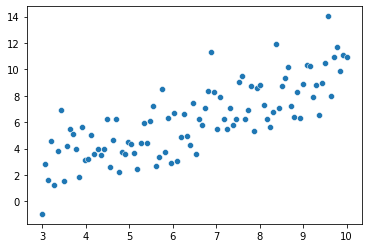

In [3]:
sns.scatterplot(x, y)

## Gradient Descent

Original Mean Squared Error(MSE) formula:  
$$MSE = \frac{1}{n} \sum \limits _{i=1} ^ {n} (y_{i} - \hat y_{i})^2$$

Substitute estimate ($\hat y_{i}$) with the equation of the regression line:  
$$f(m,c)= \frac{1}{n} \sum \limits _{i=1} ^ {n} (y_{i} - (mx_{i}+c))^2$$

### Partial derivatives:

Derivative of *f* with respect to slope (m):  
$$\frac{\partial f}{\partial m} = \frac{1}{n} \sum \limits _{i=1} ^ {n} -2 x_{i}(y_{i} - (mx_{i}+c))$$

In [4]:
D_m = lambda x, err: -2 * x.dot(err).sum() / len(x)

Derivative of *f* with respect to intercept (c):  
$$\frac{\partial f}{\partial c} = \frac{1}{n} \sum \limits _{i=1} ^ {n} -2(y_{i} - (mx_{i}+c))$$

In [5]:
D_c = lambda err: -2 * err.sum() / len(x)

In [6]:
init_rand_param = lambda: np.random.normal(loc=0, scale=2, size=1)[0]-1

In [17]:
def gradient_descent(x, y, lr=0.0005, epochs=100):
    loss = []
    m, c = init_rand_param(), init_rand_param()

    for i in range(epochs):
        y_hat = m*x + c
        err = y - y_hat

        mse = 1/len(x) * (err**2).sum()
        loss.append(mse)

        slope_grad = D_m(x, err)
        intercept_grad = D_c(err)

        m -= lr * slope_grad
        c -= lr * intercept_grad    
        
    return m, c, loss

### Learned slope (m) and intercept (c)

In [18]:
%%timeit

gradient_descent(x, y)

2.55 ms ± 824 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
m, c, loss_history = gradient_descent(x, y)
m,c

(1.4914747851160794, -3.752668524024974)

### Visualise loss

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

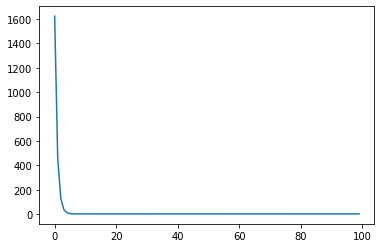

In [20]:
sns.lineplot(range(0, len(loss_history)), loss_history)

# Compare to statsmodel OLS

In [21]:
import statsmodels.api as sm

In [22]:
exog = sm.add_constant(y, prepend=False)
model = sm.OLS(x, exog)
result = model.fit()

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     164.9
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.00e-22
Time:                        16:26:24   Log-Likelihood:                -163.89
No. Observations:                 100   AIC:                             331.8
Df Residuals:                      98   BIC:                             337.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5846      0.046     12.843      0.000       0.494       0.675
const          2.8727      0.309      9.290      0.000       2.259       3.486
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.849
Skew:                          -0.283   Prob(JB):                        0.397
Kurtosis:                       2.648   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualise orig and learned lines

In [24]:
learned_params = m*x+c
err = y - learned_params
mse = 1/len(x) * (err**2).sum()
display('Learned MSE: {}'.format(mse))

'Learned MSE: 3.6480252852869426'

In [15]:
ols_params = result.params[0]*x+result.params[1]
err = y - ols_params
mse = 1/len(x) * (err**2).sum()
display('Statsmodel OLS MSE: {}'.format(mse))

'Statsmodel OLS MSE: 4.062306465245098'

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

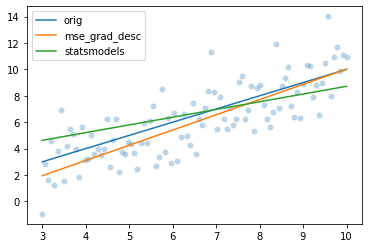

In [16]:
sns.scatterplot(x, y, alpha=0.3)

sns.lineplot(x, x, label='orig')
sns.lineplot(x, learned_params, label='mse_grad_desc')
sns.lineplot(x, ols_params, label='statsmodels')

plt.legend()
plt.show()